In [1]:
import os

import ndjson
import pandas as pd
import scipy.stats as stats

import src.topicevolution.infodynamics as ntr 
from src.topicevolution.downsampling import import_normalize
from src.ts.granger_causality import main as granger
from src.vis.news_sentiment import adaptiveline_infodynamics, regline

In [2]:
model_path = os.path.join('models', '200915_IMda_asm')
doctop_path = os.path.join(model_path, 'doctop_mats', '6T_ASM_mat.ndjson')

<br>

## Topic usage

Downsample (average topic usage per day)

In [3]:
# doctop_avg = import_normalize(doctop_path=doctop_path,
#                               train_data_path='PICKLE',
#                               meta_data_path='PICKLE')

doctop_avg = pd.read_csv(
    os.path.join(model_path, '200915_IMda_doctop_daily_avg.csv')
)

ids = doctop_avg.doc_id

doctop_avg = doctop_avg.drop('doc_id', axis=1).values.tolist()

<br>

## NTR

Use downsampled document-topic matrix

In [4]:
ntr.calculate(
    doc_top_prob=doctop_avg,
    ID=ids,
    window=7,
    out_dir=os.path.join(model_path, 'ntr', '6T_avg'),
    curb_incomplete=True,
)

<br>

## Granger

In [3]:
with open(os.path.join(model_path, 'ntr', '6T_avg', '7W.ndjson')) as f:
    ntr_avg_7 = pd.DataFrame(ndjson.load(f))
    ntr_avg_7.doc_id = pd.to_datetime(ntr_avg_7.doc_id)

In [6]:
ntr_csl_topics = granger(
    df_predictors=ntr_avg_7[['novelty', 'transience', 'resonance']],
    df_outcome=pd.DataFrame(doctop_avg[7:-7])
)

topics_csl_ntr = granger(
    df_predictors=pd.DataFrame(doctop_avg[7:-7]),
    df_outcome=ntr_avg_7[['novelty', 'transience', 'resonance']]
)

[ADF test] df_predictors
novelty : non_stationary
transience : non_stationary
resonance : non_stationary
[ADF test] df_outcome
0 : non_stationary
1 : non_stationary
2 : non_stationary
3 : non_stationary
4 : non_stationary
5 : non_stationary
Checking column novelty ~ 0

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3955  , p=0.5295  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=0.3960  , p=0.5292  , df=1
likelihood ratio test: chi2=0.3960  , p=0.5292  , df=1
parameter F test:         F=0.3955  , p=0.5295  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0073  , p=0.3654  , df_denom=2112, df_num=2
ssr based chi2 test:   chi2=2.0194  , p=0.3643  , df=2
likelihood ratio test: chi2=2.0184  , p=0.3645  , df=2
parameter F test:         F=1.0073  , p=0.3654  , df_denom=2112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9176  , p=0.4315  , df_denom=2109, df_num=3
ssr

/home/jan/hpv-vaccine/src/ts/granger_causality.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pred"] = df_predictor[col_p].values


ssr based F test:         F=0.1479  , p=0.9311  , df_denom=2109, df_num=3
ssr based chi2 test:   chi2=0.4451  , p=0.9308  , df=3
likelihood ratio test: chi2=0.4451  , p=0.9308  , df=3
parameter F test:         F=0.1479  , p=0.9311  , df_denom=2109, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1526  , p=0.9619  , df_denom=2106, df_num=4
ssr based chi2 test:   chi2=0.6130  , p=0.9616  , df=4
likelihood ratio test: chi2=0.6129  , p=0.9616  , df=4
parameter F test:         F=0.1526  , p=0.9619  , df_denom=2106, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.1186  , p=0.9883  , df_denom=2103, df_num=5
ssr based chi2 test:   chi2=0.5960  , p=0.9882  , df=5
likelihood ratio test: chi2=0.5959  , p=0.9882  , df=5
parameter F test:         F=0.1186  , p=0.9883  , df_denom=2103, df_num=5
Checking column novelty ~ 5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.0029 , p=0.0016  , df_denom=2

ssr based F test:         F=1.0750  , p=0.3672  , df_denom=2106, df_num=4
ssr based chi2 test:   chi2=4.3186  , p=0.3646  , df=4
likelihood ratio test: chi2=4.3142  , p=0.3652  , df=4
parameter F test:         F=1.0750  , p=0.3672  , df_denom=2106, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.8356  , p=0.5242  , df_denom=2103, df_num=5
ssr based chi2 test:   chi2=4.2001  , p=0.5210  , df=5
likelihood ratio test: chi2=4.1959  , p=0.5216  , df=5
parameter F test:         F=0.8356  , p=0.5242  , df_denom=2103, df_num=5
Checking column transience ~ 5

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.6697 , p=0.0000  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=58.7529 , p=0.0000  , df=1
likelihood ratio test: chi2=57.9528 , p=0.0000  , df=1
parameter F test:         F=58.6697 , p=0.0000  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.3932 , p=0.0000  , df_deno

parameter F test:         F=29.6853 , p=0.0000  , df_denom=2103, df_num=5
Checking column resonance ~ 4

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.4605  , p=0.0037  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=8.4725  , p=0.0036  , df=1
likelihood ratio test: chi2=8.4556  , p=0.0036  , df=1
parameter F test:         F=8.4605  , p=0.0037  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9320  , p=0.0197  , df_denom=2112, df_num=2
ssr based chi2 test:   chi2=7.8826  , p=0.0194  , df=2
likelihood ratio test: chi2=7.8679  , p=0.0196  , df=2
parameter F test:         F=3.9320  , p=0.0197  , df_denom=2112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1303  , p=0.0247  , df_denom=2109, df_num=3
ssr based chi2 test:   chi2=9.4220  , p=0.0242  , df=3
likelihood ratio test: chi2=9.4011  , p=0.0244  , df=3
parameter F test:         F=3.1303  , p=0.0247  , df_denom

ssr based F test:         F=0.4704  , p=0.7986  , df_denom=2103, df_num=5
ssr based chi2 test:   chi2=2.3643  , p=0.7968  , df=5
likelihood ratio test: chi2=2.3629  , p=0.7970  , df=5
parameter F test:         F=0.4704  , p=0.7986  , df_denom=2103, df_num=5
Checking column 3 ~ transience

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=82.7733 , p=0.0000  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=82.8907 , p=0.0000  , df=1
likelihood ratio test: chi2=81.3098 , p=0.0000  , df=1
parameter F test:         F=82.7733 , p=0.0000  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=69.6135 , p=0.0000  , df_denom=2112, df_num=2
ssr based chi2 test:   chi2=139.5565, p=0.0000  , df=2
likelihood ratio test: chi2=135.1493, p=0.0000  , df=2
parameter F test:         F=69.6135 , p=0.0000  , df_denom=2112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=57.9379 , p=0.0000  , df_deno

ssr based F test:         F=17.4390 , p=0.0000  , df_denom=2106, df_num=4
ssr based chi2 test:   chi2=70.0542 , p=0.0000  , df=4
likelihood ratio test: chi2=68.9190 , p=0.0000  , df=4
parameter F test:         F=17.4390 , p=0.0000  , df_denom=2106, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=14.2264 , p=0.0000  , df_denom=2103, df_num=5
ssr based chi2 test:   chi2=71.5039 , p=0.0000  , df=5
likelihood ratio test: chi2=70.3213 , p=0.0000  , df=5
parameter F test:         F=14.2264 , p=0.0000  , df_denom=2103, df_num=5
Checking column 5 ~ resonance

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.7322 , p=0.0000  , df_denom=2115, df_num=1
ssr based chi2 test:   chi2=32.7786 , p=0.0000  , df=1
likelihood ratio test: chi2=32.5275 , p=0.0000  , df=1
parameter F test:         F=32.7322 , p=0.0000  , df_denom=2115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.8477 , p=0.0000  , df_denom

In [7]:
ntr_csl_topics

,Outcome,Predictor (Topic),Significance (p<0.01),maxlag
0,novelty,3,0.0000,1
1,novelty,3,0.0022,5
2,novelty,5,0.0016,1
3,transience,2,0.0002,1
4,transience,2,0.0000,2
5,transience,2,0.0000,3
6,transience,2,0.0000,4
7,transience,2,0.0000,5
8,transience,3,0.0000,1
9,transience,3,0.0000,2


In [8]:
topics_csl_ntr

,Outcome,Predictor (Topic),Significance (p<0.01),maxlag
0,0,transience,0.0051,4
1,0,resonance,0.0034,2
2,0,resonance,0.0023,3
3,0,resonance,0.0004,4
4,0,resonance,0.0001,5
5,1,transience,0.0035,3
6,1,transience,0.0036,4
7,1,transience,0.0027,5
8,1,resonance,0.0097,4
9,1,resonance,0.0062,5


<br>

### Vis

In [4]:
adaptiveline_infodynamics(
    x1=ntr_avg_7.novelty,
    x2=ntr_avg_7.resonance,
    dates=ntr_avg_7.doc_id,
    dataset_name='Infomedia',
    plot_label='Infodynamics',
    c=['mistyrose', 'indianred', 'darkred'],
    normalize_signal=True,
    filter_span=[32, 56, 128],
    my_dpi=300,
    fname=os.path.join(model_path, 'timeseries', 'adaptline_NR_norm.png')
)

adaptiveline_infodynamics(
    x1=ntr_avg_7.novelty,
    x2=ntr_avg_7.resonance,
    dates=ntr_avg_7.doc_id,
    dataset_name='Infomedia',
    plot_label='Infodynamics',
    c=['mistyrose', 'indianred', 'darkred'],
    normalize_signal=False,
    filter_span=[32, 56, 128],
    my_dpi=300,
    fname=os.path.join(model_path, 'timeseries', 'adaptline_NR_raw.png')
)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


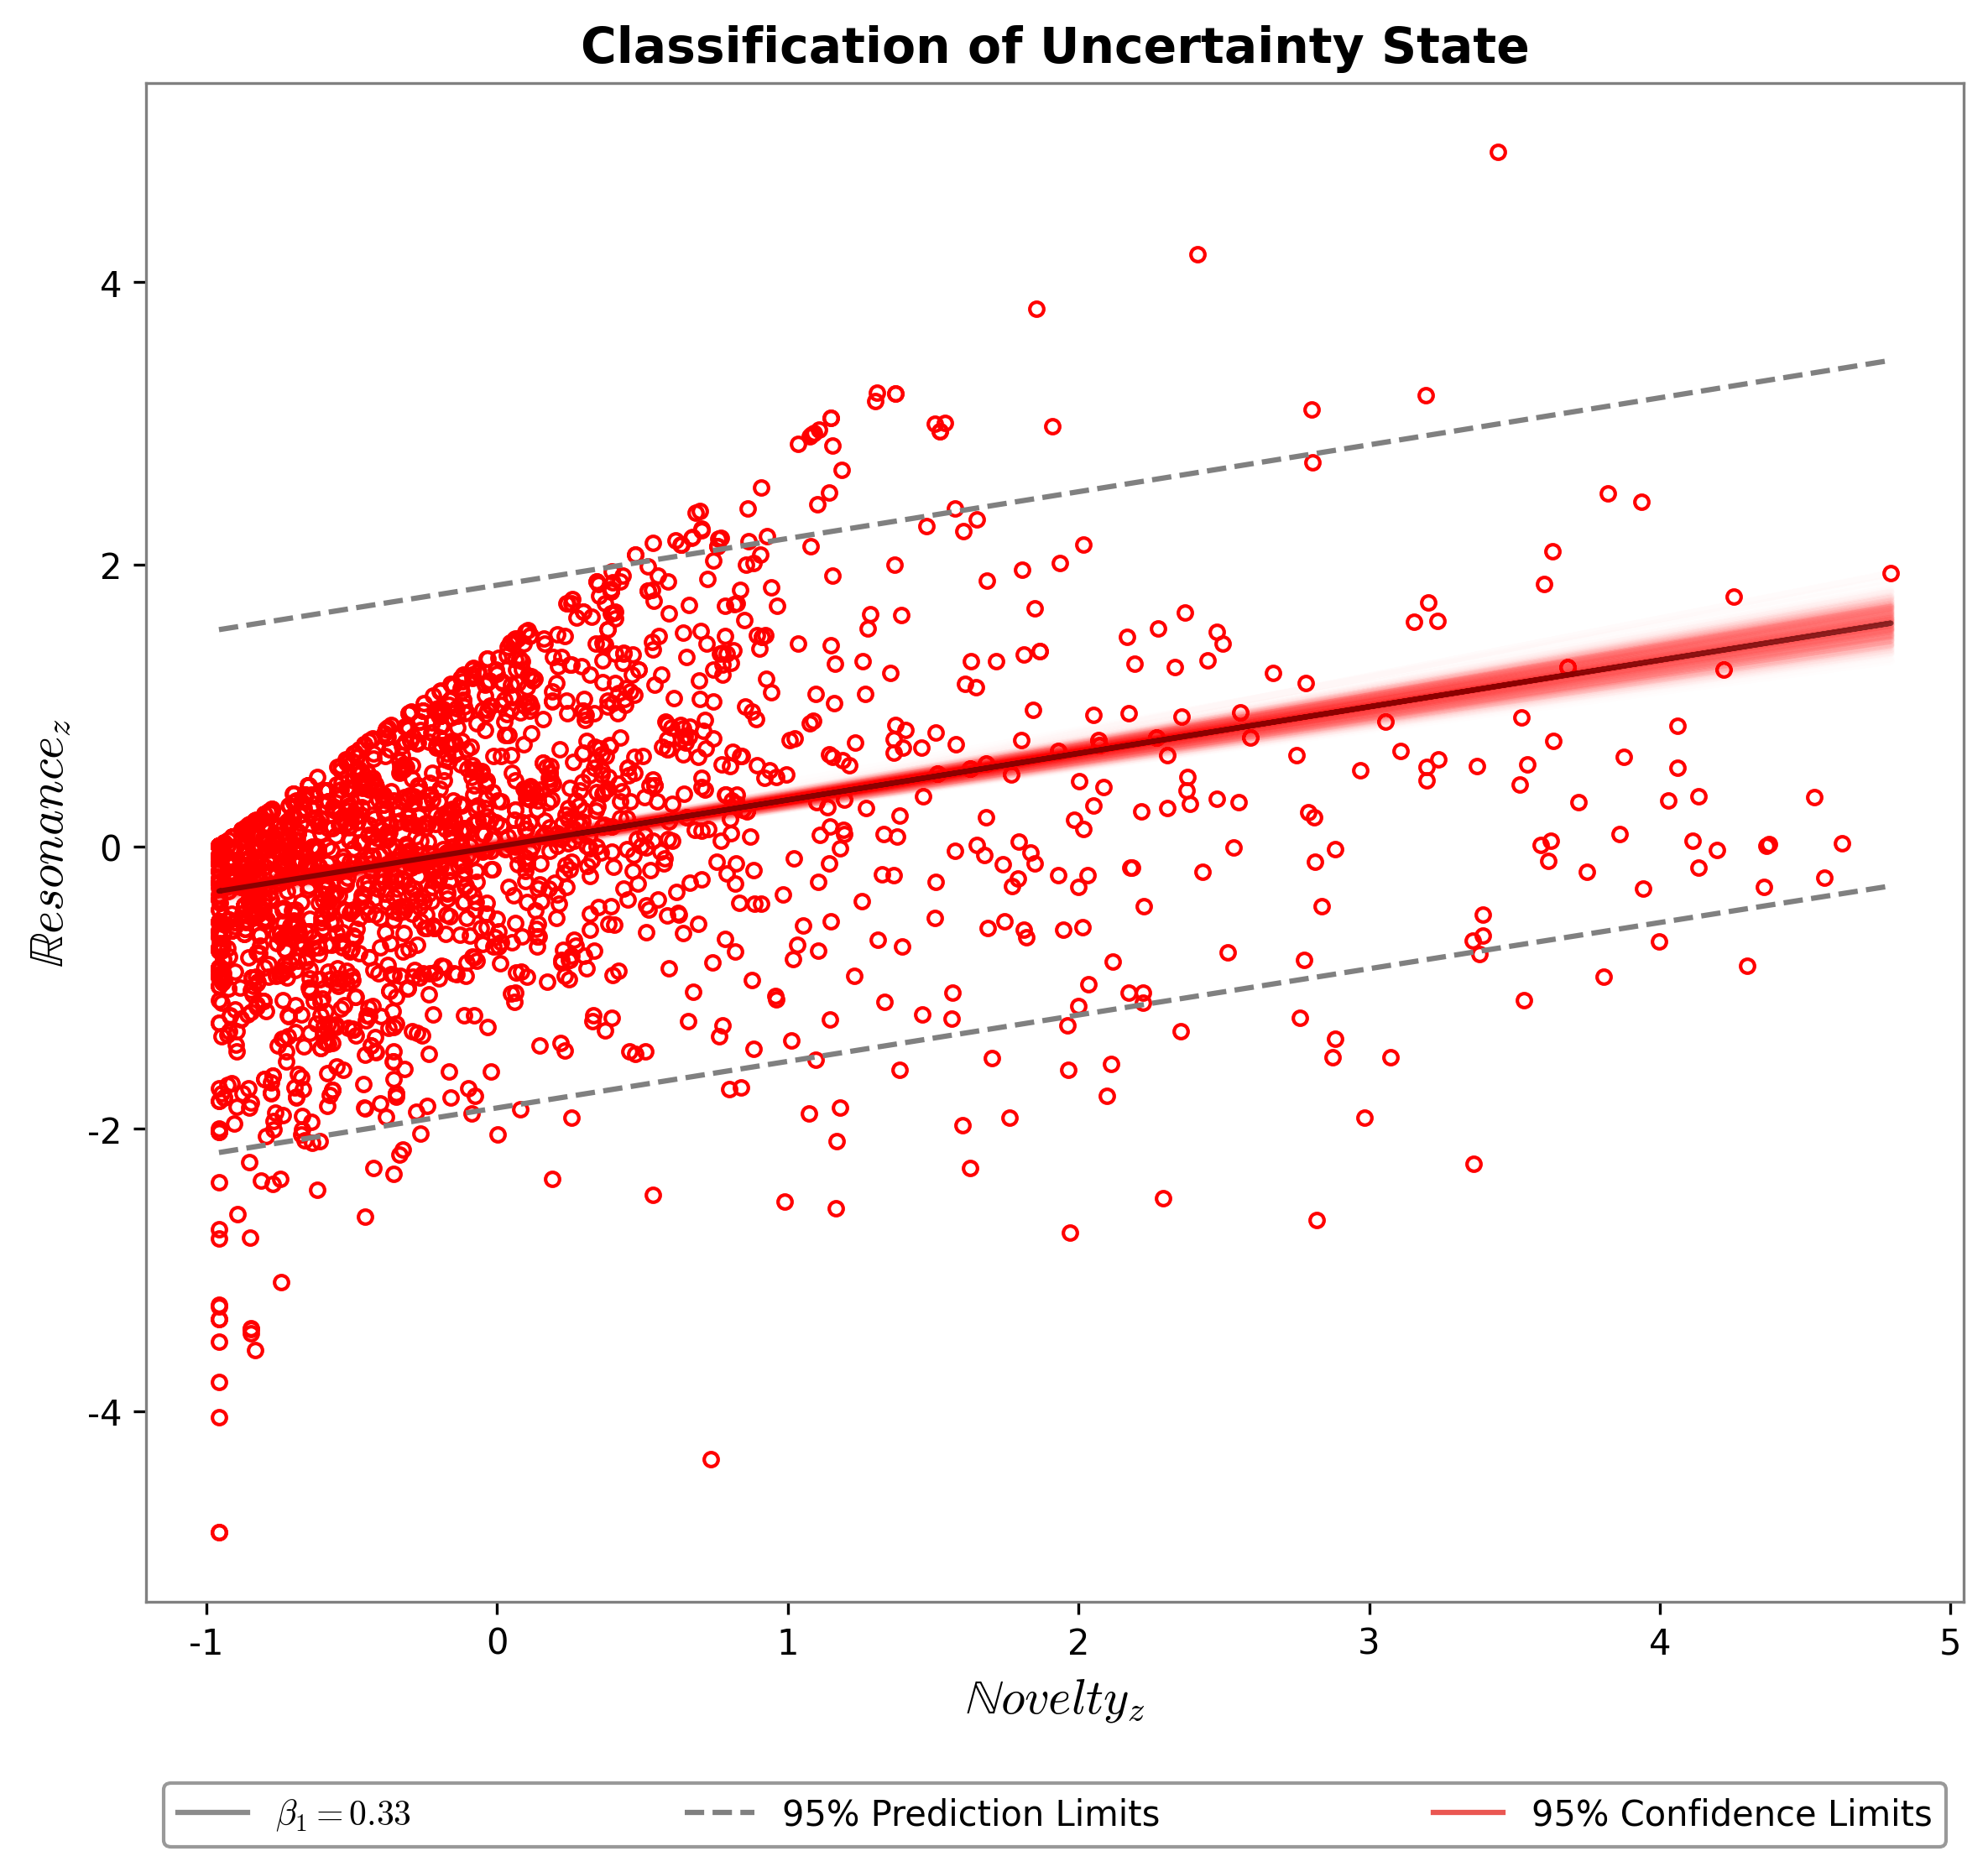

In [10]:
regline(
    x=stats.zscore(ntr_avg_7.novelty),
    y=stats.zscore(ntr_avg_7.resonance),
    bootstap=True,
    fname=os.path.join(model_path, 'timeseries', 'regline_NR.png')
)